In [2]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import glob
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from scipy import stats
from mne.viz import circular_layout, plot_connectivity_circle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import pyreadstat

from matplotlib import cm
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from statannot import add_stat_annotation
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

D:\Anaconda3\envs\py38\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import scipy.io as scio
import os

In [3]:
groupid_2 = ["Stroke"]*15+["Control"]*15
groupid_3 = ["Mild","Mild","Severe","Severe","Severe","Severe",
           "Mild","Severe","Severe","Mild","Severe","Severe","Mild","Severe","Mild"]+["Control"]*15

In [3]:
top_dir = 'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\01-extracted_timeseries'
out_dir = 'H:\Matlab\Work\Stroke15\Mutilayer\Results\Static'
out2_dir = 'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\'

# modularity across density 

In [13]:
# groupid = ["Stroke"]*15+["Control"]*15

parcellations = np.asarray([
                            ['network32', 'Network32', 32],
#                             ['power', 'Power', 264], 
#                             ['schaefer', 'Schaefer', 300],
#                             ['aal', 'AAl', 132]
                            ])

top_dir = 'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\01-extracted_timeseries'
out_dir = 'H:\Matlab\Work\Stroke15\Mutilayer\Results\Static'
out2_dir = 'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\'
n_sub = 30
modularity_altas = {}
for p in parcellations:
    floder = p[1]
    altas = p[0]
    modularityq_path = out_dir + '\\'+ floder+ f'\{altas}_modularity_across_density.mat'
    modularity_q_mat = scio.loadmat(modularityq_path)
    q_key = list(modularity_q_mat.keys())[-1]
    q_values = modularity_q_mat[q_key]
    avg_across_sig_density = np.mean(q_values[:,0:5],axis = 1)

    modularity = {}
#     modularity['Group_2'] = list(groupid_2)
    modularity['Group'] = list(groupid_3)
    modularity['Modularity'] = list(np.squeeze(avg_across_sig_density))
    modularity_df = pd.DataFrame(modularity)
    modularity_altas[altas] = modularity_df   

In [14]:
modularity_altas

{'network32':       Group  Modularity
 0      Mild    0.520059
 1      Mild    0.422246
 2    Severe    0.532700
 3    Severe    0.579724
 4    Severe    0.554257
 5    Severe    0.409779
 6      Mild    0.477095
 7    Severe    0.575486
 8    Severe    0.422333
 9      Mild    0.532460
 10   Severe    0.496361
 11   Severe    0.572241
 12     Mild    0.453477
 13   Severe    0.455228
 14     Mild    0.529051
 15  Control    0.529569
 16  Control    0.611032
 17  Control    0.527070
 18  Control    0.623711
 19  Control    0.528407
 20  Control    0.612670
 21  Control    0.647956
 22  Control    0.660133
 23  Control    0.434665
 24  Control    0.604254
 25  Control    0.609001
 26  Control    0.519552
 27  Control    0.518750
 28  Control    0.649262
 29  Control    0.585589}

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  app.launch_new_instance()


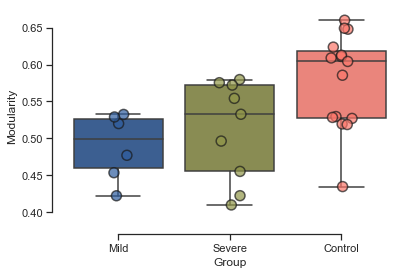

In [23]:
## 3 groups 
sns.set_style("ticks")
# sns.set_theme(style="ticks", palette="pastel")

sns.stripplot(x="Group", y="Modularity", 
              #color="whitesmoke", 
              jitter= True,
#               palette=["#2e5d9f", "#919649"],
              palette=["#2e5d9f", "#919649", '#fc766a'],
              #palette="Set2",
#               split=True,
              data = modularity_altas['network32'],
              size = 10,
              edgecolor = 'k',
              linewidth = 1.5,
              alpha =0.7
             )

ax3 = sns.boxplot(x="Group", y="Modularity",
#             hue="Age",
#             capsize=.1,
#             estimator= np.mean,
#             ci="sd",
#             errcolor="k",
            #palette='Set2',
            #hue="Patient_status", kind="bar",  
#             palette=["#2e5d9f", "#919649"],
            palette=["#2e5d9f", "#919649", '#fc766a'],
#             palette="vlag",
#             whis = 1.5, 
#             width = 2,
            data = modularity_altas['network32'],
            
#             ylim=(1.0, 5)
           )

sns.despine(offset=10, trim=True)

# pairs= [
# #     (("Mild"),("Severe")),\
#     (("Mild"),("Control")),\
#     (("Severe"),("Control"))
#     ]
# test = ttest_ind(permutations=5000)
# add_stat_annotation(ax = ax3, box_pairs = pairs, data =  modularity_altas['network32'],
#                     test='t-test_ind',
# #                     perform_stat_test=False, 
# #                     pvalues=[4.489e-02],
#                     line_offset_to_box = 0.08, line_offset = 0.01, line_height = 0.01, text_offset = 0.08,
#                     loc='inside',x= "Group", y= "Modularity",verbose=2)

plt.savefig('./Results/Visualization/network32_denstiy_static_without_atr.png', dpi = 300, bbox_inches='tight')

# network 32
# Severe v.s. Control: t-test independent samples with Bonferroni correction, P_val=4.917e-02 stat=-2.413e+00
# Mild v.s. Control: t-test independent samples with Bonferroni correction, P_val=1.293e-02 stat=-3.058e+00

In [5]:
modulariy_across_density = pd.read_excel(out2_dir+'modularity_across_density.xlsx')

In [1]:
print(modulariy_across_density)

import statsmodels.api as sm
from statsmodels.formula.api import ols

density = [i for i in np.linspace(0.04,0.2,17)]
print(density)


for i in density:
#     modulariy_across_density.loc[modulariy_across_density['Density'] == 0.04]
    model = ols('Modularity ~ C(Group)', data= modulariy_across_density.loc[modulariy_across_density['Density'] == i] ).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'######### density -->{i}  ########## ')
    print(anova_table)


# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# model = ols('Modularity ~ C(Group) + C(Density) + C(Group):C(Density)', data = modulariy_across_density).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table


# 	sum_sq	df	F	PR(>F)
# C(Group)	0.350757	2.0	47.251955	2.186816e-19
# C(Density)	1.700706	16.0	28.638664	5.991141e-59
# C(Group):C(Density)	0.046324	32.0	0.390034	9.990745e-01
# Residual	1.703607	459.0	NaN	NaN

# Modularity verus NIHSS

In [28]:
from scipy import stats

static_m =  np.array(modularity_altas['network32']['Modularity'])
NIHSS = [4,2,20,8,10,11,2,6,14,2,8,9,4,8,1]
print(static_m)
r_m_NIHSS = stats.pearsonr(static_m[:15],NIHSS)
print(r_m_NIHSS)

[0.52005889 0.42224559 0.53270018 0.57972355 0.55425713 0.40977928
 0.47709524 0.5754859  0.42233313 0.53246015 0.49636116 0.57224101
 0.45347687 0.45522753 0.52905125 0.52956901 0.61103245 0.52707009
 0.62371107 0.52840739 0.61266997 0.64795626 0.66013347 0.4346653
 0.6042543  0.60900143 0.51955222 0.51874952 0.64926209 0.58558912]
(0.004912213506268137, 0.9861379927242213)


# Moudlairy via 100 repetition 

In [33]:
# groupid = ["Stroke"]*15+["Control"]*15

parcellations = np.asarray([
                            ['network32', 'Network32', 32],
#                             ['power', 'Power', 264], 
#                             ['schaefer', 'Schaefer', 300],
#                             ['aal', 'AAl', 132]
                            ])

top_dir = 'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\01-extracted_timeseries'
out_dir = 'H:\Matlab\Work\Stroke15\Mutilayer\Results'
out2_dir = 'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\'
n_sub = 30
modularity_altas = {}
for p in parcellations:
    floder = p[1]
    altas = p[0]
    modularityq_path = out_dir + '\\'+ floder+ f'\{altas}no_smooth_normalized_modularity.mat'
    modularity_q_mat = scio.loadmat(modularityq_path)
    q_key = list(modularity_q_mat.keys())[-1]
    q_values = modularity_q_mat[q_key]
#     print(q_values)
#     break
    modularity = {}
#     modularity['Group_2'] = list(groupid_2)
    modularity['Group'] = list(groupid_3)
    modularity['Modularity'] = list(np.squeeze(q_values))
    modularity_df = pd.DataFrame(modularity)
    modularity_altas[altas] = modularity_df   

In [34]:
# modularity_altas['power']
# modularity_altas
modularity_altas

{'network32':       Group  Modularity
 0      Mild    1.565053
 1      Mild    1.724448
 2    Severe    1.608654
 3    Severe    1.773942
 4    Severe    1.722696
 5    Severe    1.397389
 6      Mild    1.710077
 7    Severe    1.700543
 8    Severe    1.310541
 9      Mild    1.790529
 10   Severe    1.866256
 11   Severe    1.888814
 12     Mild    1.495426
 13   Severe    1.440039
 14     Mild    1.697375
 15  Control    1.544286
 16  Control    1.867099
 17  Control    1.680905
 18  Control    1.865286
 19  Control    1.701149
 20  Control    1.718102
 21  Control    2.054592
 22  Control    2.102671
 23  Control    1.545801
 24  Control    1.849490
 25  Control    1.738770
 26  Control    1.487016
 27  Control    1.794248
 28  Control    2.062669
 29  Control    1.853455}

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  app.launch_new_instance()
No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Stroke v.s. Control: t-test independent samples with Bonferroni correction, P_val=3.776e-04 stat=-4.040e+00


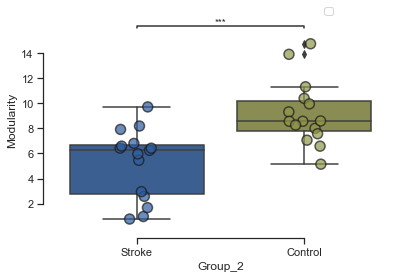

In [36]:
## 2 groups 
sns.set_style("ticks")
# sns.set_theme(style="ticks", palette="pastel")

sns.stripplot(x="Group_2", y="Modularity", 
              #color="whitesmoke", 
              jitter= True,
              palette=["#2e5d9f", "#919649"],
#               palette=["#2e5d9f", "#919649", '#fc766a'],
              #palette="Set2",
#               split=True,
              data = modularity_altas['network32'],
              size = 10,
              edgecolor = 'k',
              linewidth = 1.5,
              alpha =0.7
             )

ax = sns.boxplot(x="Group_2", y="Modularity",
#             hue="Age",
#             capsize=.1,
#             estimator= np.mean,
#             ci="sd",
#             errcolor="k",
            #palette='Set2',
            #hue="Patient_status", kind="bar",  
            palette=["#2e5d9f", "#919649"],
#             palette=["#2e5d9f", "#919649", '#fc766a'],
#             palette="vlag",
#             whis = 1.5, 
#             width = 2,
            data = modularity_altas['network32'],
            
#             ylim=(1.0, 5)
           )

sns.despine(offset=10, trim=True)

plt.legend(bbox_to_anchor=(0.81, 1.02), loc = 2, borderaxespad=0.)



# When creating the legend, only use the first two elements
# to effectively remove the last two.
# plt.legend(handles[0:2], labels[0:2], loc= 1, borderaxespad=0.)

pairs= [
    (("Stroke"),("Control")),\
    ]
# test = ttest_ind(permutations=5000)
add_stat_annotation(ax = ax, box_pairs = pairs, data =  modularity_altas['network32'],
                    test='t-test_ind',
#                     perform_stat_test=False, 
#                     pvalues=[4.489e-02],
                    line_offset_to_box = 0.08, line_offset = 0.01, line_height = 0.01, text_offset = 0.08,
                    loc='inside',x= "Group_2", y= "Modularity",verbose=2)


plt.savefig('./Results/Visualization/network32_abs_static_2.png', dpi = 300, bbox_inches='tight')

# aal :     Stroke v.s. Control t-test independent samples with Bonferroni correction: P_val=2.686e-04 stat=-4.166e+00
# network32 :Stroke v.s. Control: t-test independent samples with Bonferroni correction, P_val=3.776e-04 stat=-4.040e+00

In [2]:
## 3 groups 
sns.set_style("ticks")
# sns.set_theme(style="ticks", palette="pastel")

sns.stripplot(x="Group", y="Modularity", 
              #color="whitesmoke", 
              jitter= True,
#               palette=["#2e5d9f", "#919649"],
              palette=["#2e5d9f", "#919649", '#fc766a'],
              #palette="Set2",
#               split=True,
              data = modularity_altas['network32'],
              size = 10,
              edgecolor = 'k',
              linewidth = 1.5,
              alpha =0.7
             )

ax3 = sns.boxplot(x="Group", y="Modularity",
#             hue="Age",
#             capsize=.1,
#             estimator= np.mean,
#             ci="sd",
#             errcolor="k",
            #palette='Set2',
            #hue="Patient_status", kind="bar",  
#             palette=["#2e5d9f", "#919649"],
            palette=["#2e5d9f", "#919649", '#fc766a'],
#             palette="vlag",
#             whis = 1.5, 
#             width = 2,
            data = modularity_altas['network32'],
            
#             ylim=(1.0, 5)
           )

sns.despine(offset=10, trim=True)

pairs= [
    (("Mild"),("Severe")),\
    (("Mild"),("Control")),\
    (("Severe"),("Control"))
    ]
# # test = ttest_ind(permutations=5000)
add_stat_annotation(ax = ax3, box_pairs = pairs, data =  modularity_altas['network32'],
                    test='t-test_ind',
#                     perform_stat_test=False, 
#                     pvalues=[4.489e-02],
                    line_offset_to_box = 0.08, line_offset = 0.01, line_height = 0.01, text_offset = 0.08,
                    loc='inside',x= "Group", y= "Modularity",verbose=2)

# plt.savefig('./Results/Visualization/aal_abs_static_3.png', dpi = 300, bbox_inches='tight')

# network 32
# Severe v.s. Control: t-test independent samples with Bonferroni correction, P_val=5.677e-03 stat=-3.359e+00
# Mild v.s. Control: t-test independent samples with Bonferroni correction, P_val=8.876e-03 stat=-3.227e+00

# power 
# Mild v.s. Severe: t-test independent samples with Bonferroni correction, P_val=7.644e-01 stat=-1.191e+00
# Severe v.s. Control: t-test independent samples with Bonferroni correction, P_val=6.708e-01 stat=1.252e+00
# Mild v.s. Control: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-4.337e-01

# aal
# Mild v.s. Severe: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-5.033e-01
# Severe v.s. Control: t-test independent samples with Bonferroni correction, P_val=1.440e-02 stat=-3.136e+00
# Mild v.s. Control: t-test independent samples with Bonferroni correction, P_val=7.449e-03 stat=-3.484e+00

In [21]:
## t_test

from bioinfokit.analys import stat


s1 = stat()
s1.ttest(df =  modularity_altas['network32'], xfac = "Group_2",res = "Modularity",test_type=2)
t1 = s1.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
p1 =  s1.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
print(s1.summary,t1,p1)


Two sample t-test with equal variance

------------------  -----------
Mean diff            0.144917
t                    2.19595
Std Error            0.0659929
df                  28
P-value (one-tail)   0.018272
P-value (two-tail)   0.0365441
Lower 95.0%          0.00973675
Upper 95.0%          0.280097
------------------  -----------

Parameter estimates

Level      Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
Control        15  1.79104   0.189114    0.0488291        1.68631        1.89576
Stroke         15  1.64612   0.171935    0.0443935        1.5509         1.74133
 2.19595 0.0365441


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pandas as pd
import numpy as np
import json
import os

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from numpy.ma import masked_array
from statsmodels.stats.multitest import multipletests
from scipy.stats import pearsonr
from functools import reduce

from bioinfokit.analys import stat
# ~~~~~~~~~~~~ define the stat model~~~~~~~~~~~~~~~~~~~
import scipy.stats as stats

modularity_a =  modularity_altas['network32']
print(modularity_a)
mild = modularity_a[modularity_a['Group'] == 'Mild']
severe = modularity_a[modularity_a['Group'] == 'Severe']
control = modularity_a[modularity_a['Group'] == 'Control']

mild_severe = pd.concat( (mild,severe),axis = 0)
severe_control = pd.concat( (severe,control),axis = 0)
mild_control = pd.concat( (mild,control),axis = 0)


s1 = stat()
s1.ttest(df = mild_severe, xfac = "Group",res = "Modularity",test_type=2)
t1 = s1.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
p1 =  s1.summary.split('/n')[0].split('\n')[9].split(' ')[-1]

s2 = stat()
s2.ttest(df = severe_control, xfac = "Group",res = "Modularity",test_type=2)
t2 = s2.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
p2 =  s2.summary.split('/n')[0].split('\n')[9].split(' ')[-1]

s3 = stat()
s3.ttest(df = mild_control, xfac = "Group",res = "Modularity",test_type=2)
t3 = s3.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
p3 =  s3.summary.split('/n')[0].split('\n')[9].split(' ')[-1]

print(p1,p2,p3)


      Group  Modularity
0      Mild    1.589867
1      Mild    1.723120
2    Severe    1.620115
3    Severe    1.775198
4    Severe    1.735266
5    Severe    1.374110
6      Mild    1.729047
7    Severe    1.693235
8    Severe    1.298375
9      Mild    1.790399
10   Severe    1.869584
11   Severe    1.876663
12     Mild    1.487642
13   Severe    1.448030
14     Mild    1.700334
15  Control    1.539930
16  Control    1.853606
17  Control    1.680091
18  Control    1.863200
19  Control    1.685449
20  Control    1.698405
21  Control    2.061938
22  Control    2.095961
23  Control    1.531452
24  Control    1.852846
25  Control    1.740635
26  Control    1.511783
27  Control    1.816494
28  Control    2.056057
29  Control    1.856979
0.697993 0.0724046 0.165181
